# Project 1: Exploring weather trends

## Outline

The steps taken to prepare the data to be visualised in the chart, presented in section 3 of this jupyter notebook are outlined here:

1. The temperatures data were first retrieved from the provided database, using the following 3 queries:

```sql
SELECT * FROM city_list WHERE country='France' --Look for the closest big city
SELECT * FROM city_data WHERE city='Paris'     --Retrieve local temperatures
SELECT * FROM global_data                      --Retrieve global temperatures
```

2. The csv files were then read in Python 3 with jupyter notebook for data analysis, using Pandas library. In particular, a 5-year moving average was calculated, by means of a loop that runs over all dataset and averages the temperatures for a moving subset of 10 years, in each iteration the 10-year subset moves to the next element (i+1). The function `mean`, neglects the missing points, so the average is correctly calculated, but over less points, which in a statistical error analysis should be considered. The code implemented can be seen in sub-section 1.1 below.
 
    
3. Data visualization and all documentation were also done in Python with jupyter notebook. As it can be seen in section 2 below, Matplotlib library was used to create the line chart. When deciding on how to visualize the trends, I considered to use different moving averages (from 5 to 20 year), which I represented and compared along with the points of the raw data. From that comparison, I considered that the 10-year one allows a good compromise between smoothing the data enough to be able to see a long-term trend, without loosing too much details (like some short-term characteristics or tendencies). I also took some typical considerations about the graph itself to correclty visualise the data (scale, fontsize, description).

## 1 - Reading the csv files and analysing the data
#### CSV data:
- Yearly average global temperature ($^\circ$C)
- Yearly average temperature of the closest big city to my location ($^\circ$C) 

In [1]:
import pandas as pd

df_Tglob = pd.read_csv('data/GlobalTemp.csv')
df_Tcity = pd.read_csv('data/ParisTemp.csv')

df_Tcity.head(10)

,year,city,country,avg_temp
0,1743,Paris,France,7.65
1,1744,Paris,France,11.48
2,1745,Paris,France,4.73
3,1746,Paris,France,NaN
4,1747,Paris,France,NaN
5,1748,Paris,France,NaN
6,1749,Paris,France,NaN
7,1750,Paris,France,11.18
8,1751,Paris,France,11.15
9,1752,Paris,France,6.97


### 1.1 - Calculating 10-year moving average 

In [10]:
MA_Tcity = []
MA_Tglob = []

# Local moving average:
for i in range(len(df_Tcity)-9): 
    MA_Tcity.append(df_Tcity['avg_temp'][i:i+10].mean())
    
# Global moving average:    
for i in range(len(df_Tglob)-9):
    MA_Tglob.append(df_Tglob['avg_temp'][i:i+10].mean())
from math import *
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module is always available.  It provides access to the
    mathematical functions defined by the C standard.

FUNCTIONS
    acos(...)
        acos(x)
        
        Return the arc cosine (measured in radians) of x.
    
    acosh(...)
        acosh(x)
        
        Return the inverse hyperbolic cosine of x.
    
    asin(...)
        asin(x)
        
        Return the arc sine (measured in radians) of x.
    
    asinh(...)
        asinh(x)
        
        Return the inverse hyperbolic sine of x.
    
    atan(...)
        atan(x)
        
        Return the arc tangent (measured in radians) of x.
    
    atan2(...)
        atan2(y, x)
        
        Return the arc tangent (measured in radians) of y/x.
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(...)
        atanh(x)
        
        Return the inverse hyperbolic tangent of x.
    
    ceil(...)
        ceil(x)
        
 

## 2 - Data visualisation - line chart

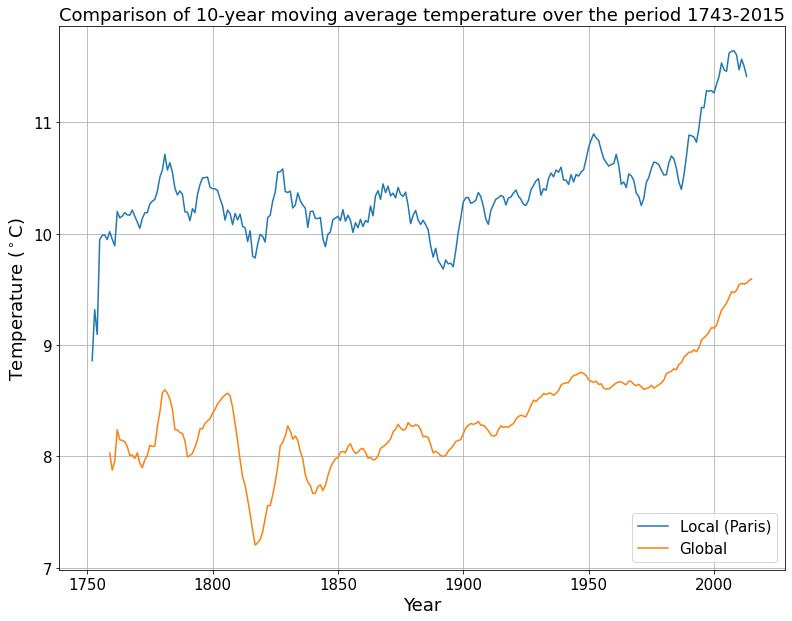

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[13,10])
plt.plot(df_Tcity['year'][9:],MA_Tcity, label='Local (Paris)') 
plt.plot(df_Tglob['year'][9:],MA_Tglob, label='Global')
plt.xlabel('Year', fontsize=18) 
plt.ylabel('Temperature ($^\circ$C)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right',fontsize=15)
plt.grid(True)

_ = plt.title('Comparison of 10-year moving average temperature over the period '
          + str(min(min(df_Tcity['year']), min(df_Tglob['year']))) +'-'
          + str(max(max(df_Tcity['year']), max(df_Tglob['year']))), fontsize=18)

## 3 - Observations

* As the chart above shows, there has been an overall warming trend for the last hundred years, at both global and local level. This trend has been more important over the last 30 years, with a comparable increase in global and local temperature averages of about 1 $^\circ$C.  

* For the first hundred years, there has been more fluctuations in temperature averages, and an overall trend is not observed.

* Paris temperature averages are about 2 $^\circ$C higher above the global averages, and this difference has been consistent over time. 

* Variations in temperature averages occurring in Paris are similar to the global ones over time, as well as short-term trends of temperature increase and decrease for several periods in the first hundred years.